A variant made on the pix2code from https://github.com/tonybeltramelli/pix2code all credits goes to him

forked and changed the versions &  eoch for compatibility


In [1]:
! git clone https://github.com/sky-gagan/capita_selecta_pix2code.git

Cloning into 'capita_selecta_pix2code'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 78 (delta 10), reused 0 (delta 0), pack-reused 58
Unpacking objects: 100% (78/78), done.
Checking out files: 100% (43/43), done.


In [2]:
! pip install -r  /content/capita_selecta_pix2code/requirements.txt

     |████████████████████████████████| 307kB 17.3MB/s 
     |████████████████████████████████| 5.0MB 55.4MB/s 
ERROR: Could not find a version that satisfies the requirement opencv-python==3.3.0.10 (from -r /content/capita_selecta_pix2code/requirements.txt (line 3)) (from versions: 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48)
ERROR: No matching distribution found for opencv-python==3.3.0.10 (from -r /content/capita_selecta_pix2code/requirements.txt (line 3))


In [3]:
# reassemble and unzip the data
!cd /content/capita_selecta_pix2code/datasets
!zip -F /content/capita_selecta_pix2code/datasets/pix2code_datasets.zip --out /content/datasets.zip
!unzip /content/datasets.zip


Streaming output truncated to the last 5000 lines.
  inflating: ios/all_data/90214823-EE42-4D1F-8008-B15551781B80.gui  
  inflating: ios/all_data/90214823-EE42-4D1F-8008-B15551781B80.png  
  inflating: ios/all_data/902B7BFF-5757-479F-BF1B-7DE905AD0CD9.gui  
  inflating: ios/all_data/902B7BFF-5757-479F-BF1B-7DE905AD0CD9.png  
  inflating: ios/all_data/904A2BA3-DB43-44AD-A4ED-B82112AF75F1.gui  
  inflating: ios/all_data/904A2BA3-DB43-44AD-A4ED-B82112AF75F1.png  
  inflating: ios/all_data/905E427F-37A6-426C-BB23-961E03F7E700.gui  
  inflating: ios/all_data/905E427F-37A6-426C-BB23-961E03F7E700.png  
  inflating: ios/all_data/905F83E5-B037-4834-86C8-9A360CBC5490.gui  
  inflating: ios/all_data/905F83E5-B037-4834-86C8-9A360CBC5490.png  
  inflating: ios/all_data/90858080-A591-4F34-A465-3FCE37C33B88.gui  
  inflating: ios/all_data/90858080-A591-4F34-A465-3FCE37C33B88.png  
  inflating: ios/all_data/90F9117F-55BA-4358-97C1-E1FD886CB104.gui  
  inflating: ios/all_data/90F9117F-55BA-4358-97C1-E1

In [4]:
! cd /content/capita_selecta_pix2code/model
! /content/capita_selecta_pix2code/model/build_datasets.py /content/ios/all_data
! /content/capita_selecta_pix2code/model/build_datasets.py /content/android/all_data
! /content/capita_selecta_pix2code/model/build_datasets.py /content/web/all_data

Splitting datasets, training samples: 1500.0, evaluation samples: 250.0
Training dataset: /content/ios/training_set
Evaluation dataset: /content/ios/eval_set
Splitting datasets, training samples: 1500.0, evaluation samples: 250.0
Training dataset: /content/android/training_set
Evaluation dataset: /content/android/eval_set
Splitting datasets, training samples: 1500.0, evaluation samples: 250.0
Training dataset: /content/web/training_set
Evaluation dataset: /content/web/eval_set


In [ ]:
# transform images (normalized pixel values and resized pictures) in training dataset to numpy arrays (smaller files if you need to upload the set to train your model in the cloud)
# usage: convert_imgs_to_arrays.py <input path> <output path>
!/content/capita_selecta_pix2code/model/convert_imgs_to_arrays.py /content/ios/training_set /content/datasets/ios/training_features
!/content/capita_selecta_pix2code/model/convert_imgs_to_arrays.py /content/android/training_set /content/datasets/android/training_features
!/content/capita_selecta_pix2code/model/convert_imgs_to_arrays.py /content/web/training_set /content/datasets/web/training_features

!/content/capita_selecta_pix2code/model/convert_imgs_to_arrays.py /content/web/eval_set ./datasets/web/evaluation_features


## 1 approach

## Train the model

In [6]:
!mkdir bin
!cd /content/capita_selecta_pix2code/model

# provide input path to training data and output path to save trained model and metadata
# usage: train.py <input path> <output path> <is memory intensive (default: 0)> <pretrained weights (optional)>
!/content/capita_selecta_pix2code/model/train.py /content/datasets/web/training_set /content/bin

# train on images pre-processed as arrays
#! /content/capita_selecta_pix2code/model/train.py /content/datasets/web/training_features /content/bin

# train with generator to avoid having to fit all the data in memory (RECOMMENDED)
! /content/capita_selecta_pix2code/model/train.py /content/datasets/web/training_features /content/bin 1

# train on top of pretrained weights
! /content/capita_selecta_pix2code/model/train.py /content/datasets/web/training_features /content/bin 1 /content/bin/pix2code.h5

2021-05-06 23:54:30.144285: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Instructions for updating:
non-resource variables are not supported in the long term
2021-05-06 23:54:31.765362: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-06 23:54:31.766388: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-06 23:54:31.833559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-06 23:54:31.834170: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/

In [19]:
! chmod u+x /content/capita_selecta_pix2code/model/sample.py

In [ ]:
!mkdir code
!cd /content/capita_selecta_pix2code/model

# generate DSL code (.gui file), the default search method is greedy
# usage: sample.py <trained weights path> <trained model name> <input image> <output path> <search method (default: greedy)>
#! /content/capita_selecta_pix2code/model/sample.py /content/bin pix2code /content/image_.png /content/code

# equivalent to command above
! /content/capita_selecta_pix2code/model/sample.py /content/bin /content/image_.png ../code greedy

# generate DSL code with beam search and a beam width of size 3
#!./sample.py ../bin pix2code ../test_gui.png ../code 3

# 2 approach

In [46]:
from os import listdir
from numpy import array
import numpy as np

from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential, model_from_json
from keras.utils import to_categorical
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.layers.convolutional import Conv2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Embedding, TimeDistributed, RepeatVector, LSTM, concatenate , Input, Reshape, Dense
from keras.preprocessing.image import array_to_img, img_to_array, load_img

import tensorflow as tf

In [47]:
DS_PATH = '/content/datasets/web/training_features/' # edit to your /path/to/train/ds
DS_EVAL_PATH = '/content/datasets/web/evaluation_features/' # edit to your /path/to/eval/ds

In [48]:
EPOCHS = 2
MAX_SEQUENCE = 100
MAX_LEN = 48

In [49]:
import matplotlib.pyplot as plt

def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

# Read a file and return a string
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

def load_data(data_dir):
    text = []
    images = []
    # Load all the files and order them
    all_filenames = listdir(data_dir)
    all_filenames.sort()
    for filename in (all_filenames):
        if filename[-3:] == "npz":
            # Load the images already prepared in arrays
            image = np.load(data_dir+filename)
            images.append(image['features'])
        else:
            # Load the boostrap tokens and rap them in a start and end tag
            syntax = '<START> ' + load_doc(data_dir+filename) + ' <END>'
            # Seperate all the words with a single space
            syntax = ' '.join(syntax.split())
            # Add a space after each comma
            syntax = syntax.replace(',', ' ,')
            text.append(syntax)
    images = np.array(images, dtype=float)
    return images, text

# Get images and text
train_features, texts = load_data(DS_PATH)

Here's what an example looks like

HTML bootstrap text: <START> header { btn-active , btn-inactive , btn-inactive } row { quadruple { small-title , text , btn-orange } quadruple { small-title , text , btn-red } quadruple { small-title , text , btn-green } quadruple { small-title , text , btn-red } } row { double { small-title , text , btn-red } double { small-title , text , btn-orange } } row { single { small-title , text , btn-green } } <END>


Text(0.5, 1.0, 'HTML bootstrap image')

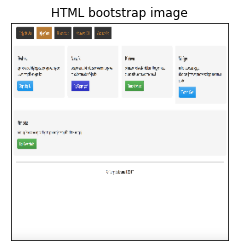

In [50]:
# Visualization
print("Here's what an example looks like\n")
print("HTML bootstrap text:", texts[0])
ax = show_img(train_features[1], figsize=(4,4))
ax.set_title('HTML bootstrap image')

In [51]:
# Dataset info as Sanity check
train_features.shape, len(texts)

((1500, 256, 256, 3), 1500)

In [52]:
train_features = train_features[:500]
texts = texts[:500]

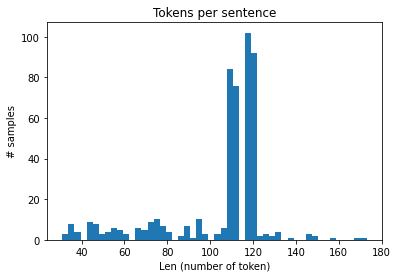

In [53]:
import re
import string

# Custom Tokenizer
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

# Plot sentence by lenght
plt.hist([len(tokenize(s)) for s in texts], bins=50)
plt.title('Tokens per sentence')
plt.xlabel('Len (number of token)')
plt.ylabel('# samples')
plt.show()

In [54]:
# Initialize the function to create the vocabulary 
tokenizer = Tokenizer(filters='', split=" ", lower=False)
# Create the vocabulary 
tokenizer.fit_on_texts([load_doc('bootstrap.vocab')])

# Add one spot for the empty word in the vocabulary 
VOCAB_SIZE = len(tokenizer.word_index) + 1

def preprocess_data(texts, features, max_sequence):
    X, y, image_data = list(), list(), list()
    sequences = tokenizer.texts_to_sequences(texts)
    for img_no, seq in enumerate(sequences):
        for i in range(1, len(seq)):
            # Add the sentence until the current count(i) and add the current count to the output
            in_seq, out_seq = seq[:i], seq[i]
            # Pad all the input token sentences to max_sequence
            in_seq = pad_sequences([in_seq], maxlen=max_sequence)[0]
            # Turn the output into one-hot encoding
            out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]
            # Add the corresponding image to the boostrap token file
            image_data.append(features[img_no])
            # Cap the input sentence to MAX_LEN tokens and add it
            X.append(in_seq[-MAX_LEN:])
            y.append(out_seq)
    return np.array(image_data), np.array(X), np.array(y)

In [55]:
# Show Vocabulary
tokenizer.word_index 

{',': 1,
 '<END>': 16,
 '<START>': 13,
 'btn-active': 15,
 'btn-green': 10,
 'btn-inactive': 8,
 'btn-orange': 11,
 'btn-red': 9,
 'double': 12,
 'header': 14,
 'quadruple': 6,
 'row': 7,
 'single': 17,
 'small-title': 4,
 'text': 5,
 '{': 2,
 '}': 3}

In [56]:
# Data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, features, n_step, max_sequence):
    # loop until we finish training
    while 1:
        # loop over photo identifiers in the dataset
        for i in range(0, len(descriptions), n_step):
            Ximages, XSeq, y = list(), list(),list()
            for j in range(i, min(len(descriptions), i+n_step)):
                image = features[j]
                # retrieve text input
                desc = descriptions[j]
                # Generate input-output pairs
                in_img, in_seq, out_word = preprocess_data([desc], [image], max_sequence)
                for k in range(len(in_img)):
                    Ximages.append(in_img[k])
                    XSeq.append(in_seq[k])
                    y.append(out_word[k])
            # yield this batch of samples to the model
            yield ([array(Ximages), array(XSeq)], array(y))

In [57]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [58]:
#Create the Image-encoder
image_model = Sequential()
image_model.add(Conv2D(16, (3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3,)))
image_model.add(Conv2D(16, (3,3), activation='relu', padding='same', strides=2))
#image_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
image_model.add(Conv2D(32, (3,3), activation='relu', padding='same', strides=2))
#image_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
image_model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
image_model.add(Conv2D(128, (3,3), activation='relu', padding='same'))

image_model.add(Flatten())
image_model.add(Dense(1024, activation='relu'))
image_model.add(Dropout(0.3))
image_model.add(Dense(512, activation='relu'))
image_model.add(Dropout(0.3))

image_model.add(RepeatVector(MAX_LEN))

visual_input = Input(shape=(256, 256, 3,))
encoded_image = image_model(visual_input)

#Create the Text-encoder
language_input = Input(shape=(MAX_LEN,))
language_model = Embedding(VOCAB_SIZE, 50, input_length=MAX_LEN, mask_zero=True)(language_input)
language_model = LSTM(128, return_sequences=True)(language_model)
language_model = LSTM(128, return_sequences=True)(language_model)

#Create the decoder
decoder = concatenate([encoded_image, language_model])
decoder = LSTM(128, return_sequences=True)(decoder)
decoder = LSTM(128, return_sequences=False)(decoder)
decoder = Dense(VOCAB_SIZE, activation='softmax')(decoder)

# Compile the model
model = Model(inputs=[visual_input, language_input], outputs=decoder)
image_model.summary()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 127, 127, 16)      2320      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)             

In [59]:
callbacks = [
    ModelCheckpoint(
        filepath='weights.h5',
        save_weights_only=True,
       save_freq=2
    )
]

# Optimizer
optimizer = RMSprop(lr=0.0001, clipvalue=1.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [ ]:
model.fit(data_generator(texts, train_features, 1, MAX_SEQUENCE), 
                    steps_per_epoch=1500, 
                    epochs=EPOCHS, 
                    callbacks=callbacks, 
                    verbose=2)

Epoch 1/2


### Load the data for Evaluation

In [ ]:
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    photo = np.array([photo])
    # seed the generation process
    in_text = '<START> '
    # iterate over the whole length of the sequence
    print('\nPrediction---->\n\n<START> ', end='')
    for i in range(150):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo, sequence], verbose=0)
        # convert probability to integer
        yhat = np.argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += word + ' '
        # stop if we predict the end of the sequence
        print(word + ' ', end='')
        if word == '<END>':
            break
    return in_text

In [ ]:
train_features, texts = load_data(DS_EVAL_PATH)

### Test accuracy

In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = list(), list()
    # step over the whole set
    for i in range(len(descriptions)):
        yhat = generate_desc(model, tokenizer, photos[i], max_length)
        # store actual and predicted
        print('\n\nReal---->\n\n' + texts[i])
        actual.append([texts[i].split()])
        predicted.append(yhat.split())
    # calculate BLEU score
    bleu = corpus_bleu(actual, predicted)
    return bleu, actual, predicted

# Eval on the first 10 samples
bleu, actual, predicted = evaluate_model(model, texts[:10], train_features[:10], tokenizer, MAX_LEN)
print("BLUE score: ", bleu)

## show results

In [ ]:
from compiler.classes.Compiler import *

#Compile the tokens into HTML and css
dsl_path = "compiler/assets/web-dsl-mapping.json"
compiler = Compiler(dsl_path)
compiled_website = compiler.compile(actual[0][0], 'index.html')